In [ ]:
# 今日目標
# 創造出自已 img資料集


In [108]:
pwd

'/Users/elisachang'

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
tf.enable_eager_execution()

In [ ]:
#test---------------

In [ ]:
images=[]
for dirPath, dirNames, fileNames in os.walk("/content/drive/My Drive/Colab Notebooks/test_create_pic/"):
    for name in fileNames:
        images.append(os.path.join(dirPath, name))

# 試試看能不能弄成灰階
i = np.array([np.array(cv2.imread(fname,0)) for fname in images])
i.shape
#yeah~     

In [ ]:
#------start--------------

In [102]:
import shutil

pathTest = r'/Users/elisachang/test_create_pic/.ipynb_checkpoints'

try:
    shutil.rmtree(pathTest)
except OSError as e:
    print(e)
else:
    print("The directory is deleted successfully")

The directory is deleted successfully


In [3]:
for dirPath, dirNames, fileNames in os.walk('/Users/elisachang/test_create_pic/'):
    print(dirNames)

['test_001', 'test_002', 'test_003']
[]
[]
[]


In [19]:
images = []
subfolders = []

for dirPath, dirNames, fileNames in os.walk('/Users/elisachang/test_create_pic/'):
    for name in fileNames:
        images.append(os.path.join(dirPath, name))

    for name in dirNames:
        subfolders.append(os.path.join(dirPath, name))

labels = []
count = 0
for a_folder in subfolders:
    n_img = len(os.listdir(a_folder))
    labels = np.append(labels, n_img * [count])
    count+=1

subfolders = np.array([images, labels])
subfolders = subfolders.transpose()
print(subfolders.shape)                   #o:(6006, 2) correct樣子：每一行兩列
# print(subfolders)
# image_list = list(subfolders[:, 0])
# # print(image_list)                           #[:, 0]=直的全部 橫的第0個column
# label_list = list(subfolders[:, 1])
# label_list = [int(float(i)) for i in label_list]
# print( image_list, label_list)

(6006, 2)


In [ ]:
#更新版的get file

In [2]:
#formal
import os
import random as r
import numpy as np

# def get_File(file_dir):

# The images in each subfolder
images = []
    
# The subfolders
subfolders = []
 
# Using "os.walk" function to grab all the files in each folder
for dirPath, dirNames, fileNames in os.walk('/Users/elisachang/test_create_pic/'):
    
    names = []
    for name in fileNames:
        names.append(os.path.join(dirPath, name))

    for name in dirNames:
        subfolders.append(os.path.join(dirPath, name))
        
    # 隨機打亂各個資料夾內的數據
    r.shuffle(names)
    if names != []:
        images.append(names)
         
# 計算最小檔案數量的資料夾
mincount = float("Inf")
for num_folder in subfolders:
    n_img = len(os.listdir(num_folder))
        
    if n_img < mincount:
        mincount = n_img
    
    # 只保留最小檔案數量
for i in range(len(images)):
    images[i] = images[i][0:mincount]
    
images = np.reshape(images, [mincount*len(subfolders), ])      #cannot reshape array of size 4 into shape (2700,)  你需要把test_create_pic多出來的檔案刪掉
    
# To record the labels of the image dataset
labels = []
for count in range(len(subfolders)):
    labels = np.append(labels, mincount * [count])
    
# 打亂最後輸出的順序，去除每個類別間的隔閡
subfolders = np.array([images, labels])
subfolders = subfolders[:, np.random.permutation(subfolders.shape[1])].T
    
image_list = list(subfolders[:, 0])
label_list = list(subfolders[:, 1])
label_list = [int(float(i)) for i in label_list]
print( image_list, label_list)
# return image_list, label_list

#太好了  真的有打亂label 到底對結果有無影響呢？

['/Users/elisachang/test_create_pic/test_001/circle_003_110.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_001_221.jpg', '/Users/elisachang/test_create_pic/test_001/circle_003_255.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_001_84.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_003_236.jpg', '/Users/elisachang/test_create_pic/test_002/square_001_256.jpg', '/Users/elisachang/test_create_pic/test_002/square_001_161.jpg', '/Users/elisachang/test_create_pic/test_002/square_001_220.jpg', '/Users/elisachang/test_create_pic/test_002/square_001_124.jpg', '/Users/elisachang/test_create_pic/test_002/square_002_293.jpg', '/Users/elisachang/test_create_pic/test_002/square_002_279.jpg', '/Users/elisachang/test_create_pic/test_001/circle_003_178.jpg', '/Users/elisachang/test_create_pic/test_002/square_002_188.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_003_133.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_002_61.jpg', '/Users/elisacha

In [5]:
image_list

['/Users/elisachang/test_create_pic/test_001/circle_003_110.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_001_221.jpg',
 '/Users/elisachang/test_create_pic/test_001/circle_003_255.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_001_84.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_003_236.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_256.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_161.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_220.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_124.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_293.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_279.jpg',
 '/Users/elisachang/test_create_pic/test_001/circle_003_178.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_188.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_003_133.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_002_61.jpg',
 '

In [11]:
# check 
# o:circle 1:square  2: triangle 
from PIL import *
from PIL import Image         # 在其他ipynb 

print(label_list[:10])         # [0, 2, 0, 2, 2]

position=1
x=image_list[position]
# label_list

img = Image.open(x) # 读取的图像显示的<matplotlib.image.AxesImage object at 0x7f9f0c60f7f0>
img.show()

print(label_list[position])

[0, 2, 0, 2, 2, 1, 1, 1, 1, 1]
2


In [40]:
# test_create_pic 有900
# vaild_create_pic 有180

len(label_list[:10])    #10
len(image_list[:10])    #10

valid_label_list=label_list[:180]
valid_image_list=image_list[:180]


len(valid_label_list)
valid_image_list

['/Users/elisachang/test_create_pic/test_001/circle_003_110.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_001_221.jpg',
 '/Users/elisachang/test_create_pic/test_001/circle_003_255.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_001_84.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_003_236.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_256.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_161.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_220.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_001_124.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_293.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_279.jpg',
 '/Users/elisachang/test_create_pic/test_001/circle_003_178.jpg',
 '/Users/elisachang/test_create_pic/test_002/square_002_188.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_003_133.jpg',
 '/Users/elisachang/test_create_pic/test_003/triangle_002_61.jpg',
 '

In [34]:
# 創建出final image
small_imgs = [Image.open(f).resize((43, 29)) for f in image_list]
image_list＿1 = np.array([np.array(img) for img in small_imgs])

image_list＿1.shape       #(2700, 29, 43, 3)

(2700, 29, 43, 3)

In [36]:
small_imgs = [Image.open(f).resize((43, 29)) for f in valid_image_list]
valid_image_list_1 = np.array([np.array(img) for img in small_imgs])

valid_image_list_1.shape         #(180, 29, 43, 3)

(180, 29, 43, 3)

In [37]:
# 創建出final label 

label_list_1=np.asarray(label_list)
label_list_2=label_list_1.reshape((len(label_list_1),1))
print(label_list_2)

[[0]
 [2]
 [0]
 ...
 [1]
 [1]
 [0]]


In [39]:
valid_label_list_1=np.asarray(valid_label_list)
valid_label_list_2=valid_label_list_1.reshape((len(valid_label_list),1))
print(valid_label_list_2)

[[0]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]]


In [ ]:
image_list＿1
valid_image_list_1
valid_label_list_2
label_list_2

In [35]:
# np_imgs.shape()         #'tuple' object is not callable   不可以有括弧！！！！


In [ ]:
# x = cv2.imread('/Users/elisachang/test_create_pic_2/tf_0_0.jpg',1)   # 沒想到轉換過後還是可以用彩色讀進來 但沒有意義 因為都是灰階
# x.shape       #(288, 432, 3)
# x
# plt.imshow(x)

In [ ]:
#prepare data---------------

In [ ]:
len(range(1000))

In [ ]:
# Python-OpenCV 处理图像（五）：图像中边界和轮廓检测
# http://python.jobbole.com/85253/?utm_source=blog.jobbole.com&utm_medium=relatedPosts

In [100]:
# 確認有多少檔案被產生


# path_001='/Users/elisachang/test_create_pic_seed/test_001/'
# path_001='/Users/elisachang/test_create_pic_seed/test_002/'
# path_001='/Users/elisachang/test_create_pic_seed/test_003/'
# path_001='/Users/elisachang/test_create_pic/test_001/'
# path_001='/Users/elisachang/test_create_pic/test_002/'
path_001='/Users/elisachang/test_create_pic/test_003/'


for dirPath, dirNames, fileNames in os.walk(path_001):
    
    names = []
    for name in fileNames:
        names.append(os.path.join(dirPath, name))
        
        
len(names)

900

In [70]:
# 如何一口氣刪除某個檔案夾裡面所有的檔案？
import os 

path_001='/Users/elisachang/test_create_pic_seed/test_001/'
# path_001='/Users/elisachang/test_create_pic_seed/test_002/'
# path_001='/Users/elisachang/test_create_pic_seed/test_003/'
# path_001='/Users/elisachang/test_create_pic/test_001/'
# path_001='/Users/elisachang/test_create_pic/test_002/'
# path_001='/Users/elisachang/test_create_pic/test_003/'

filelist=[f for f in os.listdir(path_001)]
for f in filelist:
#     print(f)
    os.remove(os.path.join(path_001,f))
    

In [98]:
#複製300張
import shutil
x=300
old_file_001='/Users/elisachang/test_create_pic_seed/test_003/triangle_001.jpg'
old_file_002='/Users/elisachang/test_create_pic_seed/test_003/triangle_002.jpg'
old_file_003='/Users/elisachang/test_create_pic_seed/test_003/triangle_003.jpg'

for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_003/triangle_001_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_003/triangle_002_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_003/triangle_003_'+str(i)+'.jpg')
    

In [97]:
#複製300張
import shutil
x=300
old_file_001='/Users/elisachang/test_create_pic_seed/test_002/square_001.jpg'
old_file_002='/Users/elisachang/test_create_pic_seed/test_002/square_002.jpg'
old_file_003='/Users/elisachang/test_create_pic_seed/test_002/square_003.jpg'

for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_002/square_001_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_002/square_002_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_002/square_003_'+str(i)+'.jpg')
    

In [92]:
#複製300張
import shutil
x=300
old_file_001='/Users/elisachang/test_create_pic_seed/test_001/circle_001.jpg'
old_file_002='/Users/elisachang/test_create_pic_seed/test_001/circle_002.jpg'
old_file_003='/Users/elisachang/test_create_pic_seed/test_001/circle_003.jpg'


for i in range(x):
    shutil.copy(old_file_001, '/Users/elisachang/test_create_pic/test_001/circle_001_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_002, '/Users/elisachang/test_create_pic/test_001/circle_002_'+str(i)+'.jpg')
    
for i in range(x):
    shutil.copy(old_file_003, '/Users/elisachang/test_create_pic/test_001/circle_003_'+str(i)+'.jpg')

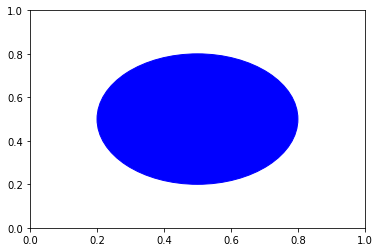

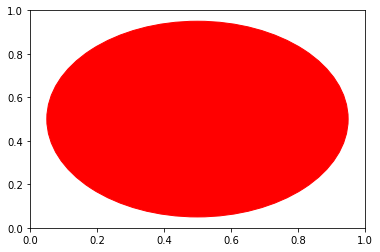

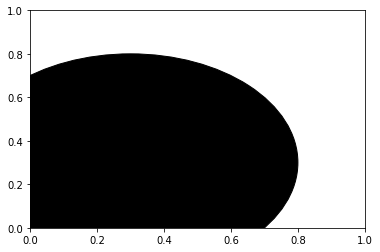

In [76]:
# (1)  創建種子
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
circle1 = plt.Circle((0.5, 0.5), 0.3 ,color='blue')
ax.add_artist(circle1)
fig.savefig('/Users/elisachang/test_create_pic_seed/test_001/circle_001.jpg')

fig, ax = plt.subplots()
circle2 = plt.Circle((0.5, 0.5), 0.45, color='red')
ax.add_artist(circle2)
fig.savefig('/Users/elisachang/test_create_pic_seed/test_001/circle_002.jpg')


fig, ax = plt.subplots()                                   #開一個新的畫布
circle3 = plt.Circle((0.3, 0.3), 0.5, color='black')
ax.add_artist(circle3)
fig.savefig('/Users/elisachang/test_create_pic_seed/test_001/circle_003.jpg')



# check size 
# import cv2
# I1 = cv2.imread('/Users/elisachang/test_create_pic/test_001/circle_001.jpg',1)  #讀進來是彩色模式,會是張量三個維度
# print(I1.shape)   

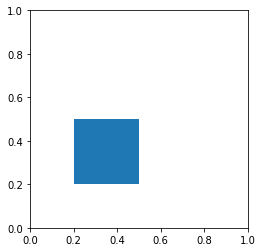

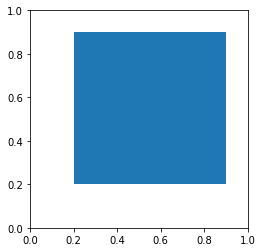

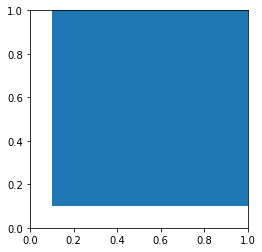

In [78]:
# 可以一口氣創造三個種子 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Rectangle((0.2, 0.2),  0.3, 0.3, ))
fig1.savefig('/Users/elisachang/test_create_pic_seed/test_002/square_001.jpg')


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Rectangle((0.2, 0.2), 0.7,0.7,))
fig1.savefig('/Users/elisachang/test_create_pic_seed/test_002/square_002.jpg')

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Rectangle((0.1, 0.1), 0.9,0.9,))
fig1.savefig('/Users/elisachang/test_create_pic_seed/test_002/square_003.jpg')



In [91]:
from PIL import Image,ImageDraw

# # Create empty black canvas  
# im = Image.new('RGB', (288, 432))


im = Image.new('RGB', (288, 432))
draw_1 = ImageDraw.Draw(im)
draw_1.polygon([(20,10), (150, 400), (200,20)], fill = (255,0,0))
im.save('/Users/elisachang/test_create_pic_seed/test_003/triangle_001.jpg')

im = Image.new('RGB', (288, 432))
draw_2 = ImageDraw.Draw(im)
draw_2.polygon([(50,20), (200, 400), (250,50)], fill = 'yellow')  
im.save('/Users/elisachang/test_create_pic_seed/test_003/triangle_002.jpg')

im = Image.new('RGB', (288, 432))
draw = ImageDraw.Draw(im)
draw.polygon([(50,20), (100, 300), (280,20)], fill = (0,0,200))       
im.save('/Users/elisachang/test_create_pic_seed/test_003/triangle_003.jpg')


# check 想看我自己做出來的

# import cv2

# I1 = cv2.imread('/Users/elisachang/test_create_pic/test_003/triangle_001.jpg',1)  #讀進來是彩色模式,會是張量三個維度

# print(I1.shape)   

# plt.imshow(I1)

In [ ]:
# 第二個參數是一個標誌，指定應該讀取圖像的方式。
# 1：加載彩色圖像。 任何圖像的透明度都將被忽略。 這是默認標誌。
# 0：以灰度模式加載圖像
# -1：加載圖像，包括alpha通道
# 不論用哪一種方法，讀進來的檔案都是一樣的 uint8 格式。


import cv2

# Loads a color image
I1 = cv2.imread('/Users/elisachang/test_create_pic/test_001/circle_001.jpg',1)  #讀進來是彩色模式,會是張量三個維度

# Loads image in grayscale mode 灰度模式
I2 = cv2.imread('/Users/elisachang/test_create_pic/test_001/circle_002.jpg', 0)   
I3 = cv2.imread('/Users/elisachang/test_create_pic/test_002/square_001.jpg', 0) 
I4 = cv2.imread('/Users/elisachang/test_create_pic/test_002/square_002.jpg', 0) 

print(I1.dtype)  #o:uint8 （0 to 255）
print(I2.dtype)
# print(I1 )           #[255 255 255] 之類的
# I2

print(I1.shape)   
print(I2.shape)
print(I3.shape)   
print(I4.shape)
plt.imshow(I2)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
 
img = Image.open('/Users/elisachang/test_create_pic/test_003/triangle_001.jpg') # 读取的图像显示的<matplotlib.image.AxesImage object at 0x7f9f0c60f7f0>
img.show()
# print(img.shape)               # 'JpegImageFile' object has no attribute 'shape'
# img.format
 
# region = img.transpose(Image.ROTATE_180) #翻转
# out = img.resize((8, 8))     # 改变大小 小心如果縮得太小 那可以看起來已經不像圓形了！！！ 實際應用時候可以來條條看怎樣可以很小但是又看得出圖片
# out = img.resize((64, 64))
out = img.resize((32, 28))
I2 = np.array(out)           # 把圖片轉成數字矩陣
print(I2.shape)

# plt.imshow(I2)               # 把數字矩陣显示图片 可以看出即使pixel 變少 但是還是可以看出是一個圖片



AttributeError: 'JpegImageFile' object has no attribute 'shape'